<h3 style='color:blue' align='center'>Customer Churn Prediction Using Artificial Neural Network (ANN)</h3>

In [321]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

**Load the data**

In [288]:
df = pd.read_csv("customer_churn.csv")
df.shape

(7043, 21)

In [289]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [291]:
df.drop('customerID',axis='columns',inplace=True)

In [292]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [293]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [294]:
df.drop_duplicates(inplace=True)

In [295]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Data Visualization**

In [296]:
Churn_Label_counts= df['Churn'].value_counts()
fig2 = px.pie(names= Churn_Label_counts.keys(), values= Churn_Label_counts.values, title='Churn Label Distribution')
fig2.show()

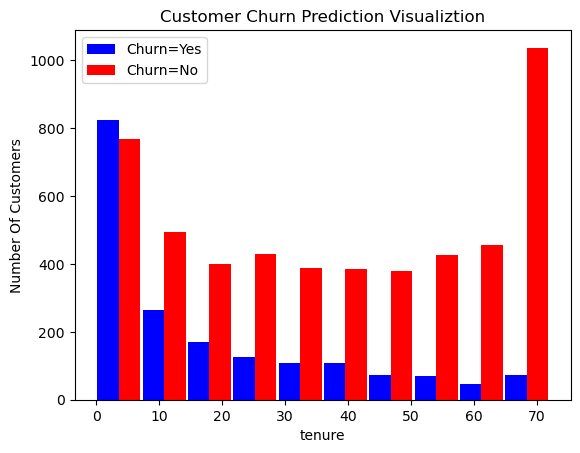

In [297]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['Blue','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

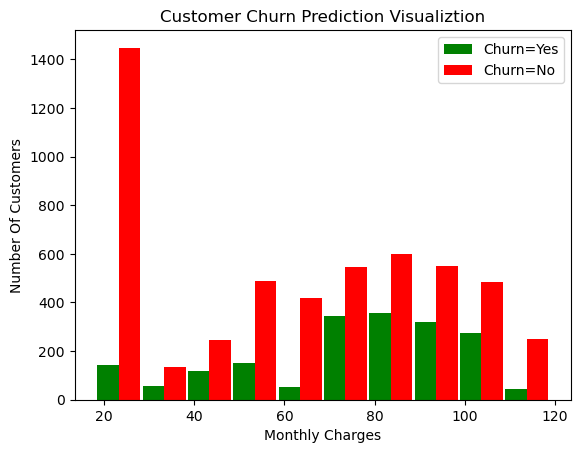

In [298]:
mc_churn_no = df[df.Churn=='No'].MonthlyCharges      
mc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

**Some of the columns have no internet service or no phone service, that can be replaced with a simple No**

In [299]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

**Encoding for categorical columns**

In [300]:
le = LabelEncoder()
object_columns = df.select_dtypes(include='object').columns
for col in object_columns:
    df[col] = le.fit_transform(df[col])

**Scaling the Feature**

In [301]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

**Checking for Outlier**

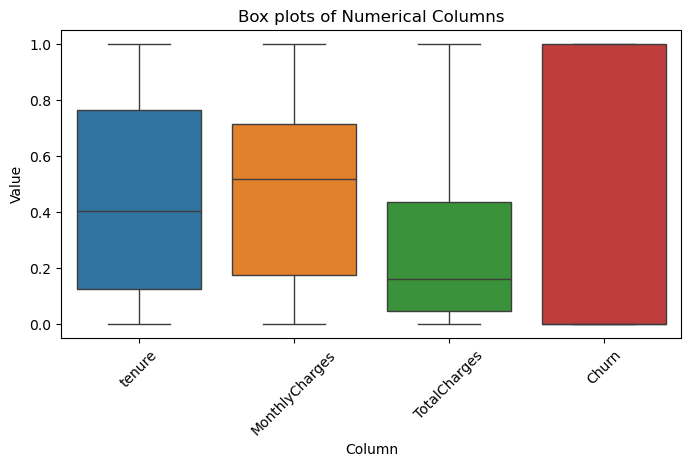

In [302]:
plt.figure(figsize=(8, 4))

sns.boxplot(data=df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], orient='v')
plt.title('Box plots of Numerical Columns')
plt.ylabel('Value')
plt.xlabel('Column')
plt.xticks(rotation=45)
plt.show()

**Train test split**

In [303]:
X = df.drop('Churn',axis='columns')
y = df['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [304]:
X_train.shape

(5616, 19)

In [305]:
X_test.shape

(1405, 19)

In [306]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2680,1,0,1,1,0.986111,1,0,0,1,1,1,1,1,1,2,0,0,0.668657,0.693642
6415,0,0,1,0,0.805556,0,0,0,1,1,0,0,1,0,1,1,2,0.269652,0.290942
5444,1,0,1,0,0.625000,1,1,1,0,1,1,0,1,1,0,1,0,0.890547,0.561274
1505,1,1,0,0,0.013889,1,1,1,0,0,0,0,0,0,0,1,2,0.561692,0.006450
4060,1,0,1,1,0.750000,1,1,0,0,0,1,0,0,1,2,0,1,0.448756,0.391219
3539,1,0,0,0,0.111111,1,0,0,0,0,0,0,0,0,0,1,3,0.267662,0.048419
1831,0,1,1,0,0.305556,1,1,0,1,1,0,1,0,0,0,1,3,0.450746,0.157281
1722,0,0,0,0,0.708333,0,0,0,0,1,1,0,1,1,1,1,1,0.379602,0.335760
5507,0,0,0,0,0.388889,1,0,0,1,1,0,1,0,0,1,1,2,0.414428,0.188772
4797,1,0,1,1,1.000000,1,1,1,1,1,1,1,1,1,2,1,1,0.953234,0.954350


**Build a model (ANN) in tensorflow/keras**

In [307]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(19, input_shape=(19,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100


c:\Users\LAPSCART\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5962 - loss: 0.6499
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7749 - loss: 0.4568
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7873 - loss: 0.4376
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7939 - loss: 0.4247
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7907 - loss: 0.4349
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7922 - loss: 0.4325
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7911 - loss: 0.4233
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.4213
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7892 - loss: 0.4243
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7915 - loss: 0.4283
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7933 - loss: 0.4311
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [308]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7900 - loss: 0.4448 


[0.4276597499847412, 0.8028469681739807]

In [309]:
yp = model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.15650795],
       [0.21123579],
       [0.00626324],
       [0.6781181 ],
       [0.0125925 ]], dtype=float32)

In [310]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [311]:
y_pred[:10]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [312]:
y_test[:10]

4391    0
2451    1
6598    0
64      1
4852    0
5683    1
1447    1
3147    0
5904    0
1895    0
Name: Churn, dtype: int32

In [313]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1029
           1       0.68      0.50      0.57       376

    accuracy                           0.80      1405
   macro avg       0.76      0.71      0.72      1405
weighted avg       0.79      0.80      0.79      1405



Text(95.72222222222221, 0.5, 'Truth')

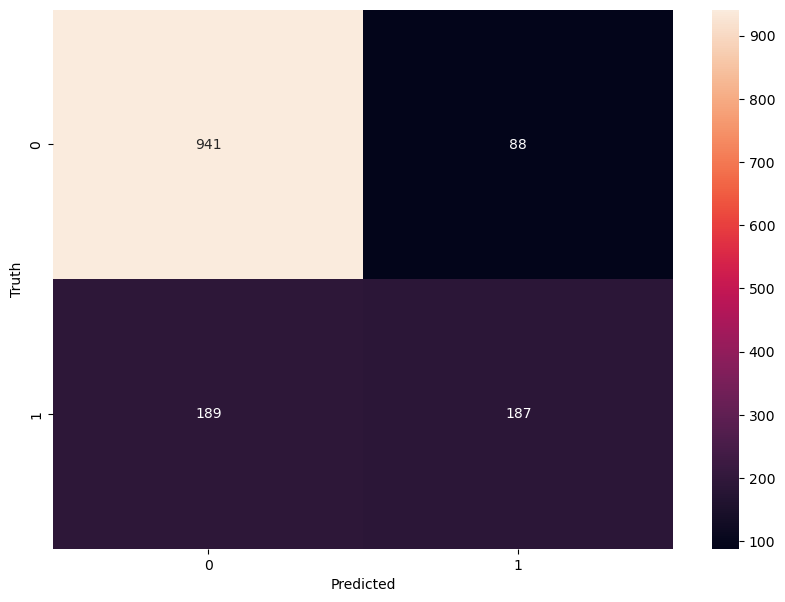

In [314]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [315]:
y_test.shape

(1405,)

**Accuracy**

In [316]:
round((862+229)/(862+229+137+179),2)

0.78

**Precision for 0 class. i.e. Precision for customers who did not churn**

In [317]:
round(862/(862+179),2)

0.83

**Precision for 1 class. i.e. Precision for customers who actually churned**

In [318]:
round(229/(229+137),2)

0.63

**Recall for 0 class**

In [319]:
round(862/(862+137),2)

0.86

In [320]:
round(229/(229+179),2)

0.56